Importing Necessary Packages;

In [1]:
import sys  #to get our python version
import numpy 
import pandas
import matplotlib
import seaborn #for correlation matrix
import scipy
import sklearn

#just checking versions
print('python:{}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))
print('Pandas:{}'.format(pandas.__version__))
print('matplotlib:{}'.format(matplotlib.__version__))
print('Seaborn:{}'.format(seaborn.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

python:3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]
Numpy:1.15.4
Pandas:0.24.1
matplotlib:3.0.2
Seaborn:0.9.0
Sklearn:0.20.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
data=pd.read_csv('/home/suprim/m_l/creditcardfraud/creditcard.csv')

#https://www.kaggle.com/mlg-ulb/creditcardfraud

In [23]:
print(data.shape)  #shows no of transactions#with  columns(31 here)


(42721, 31)


In [5]:
print(data.columns)#shows columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [26]:
# print(data.head)

In [6]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

# Taking Fraction of Data

In [27]:
data=data.sample(frac=0.15,random_state=1) #since this is huge data so we take only 15% as sample data randomly

print(data.shape)

(6408, 31)


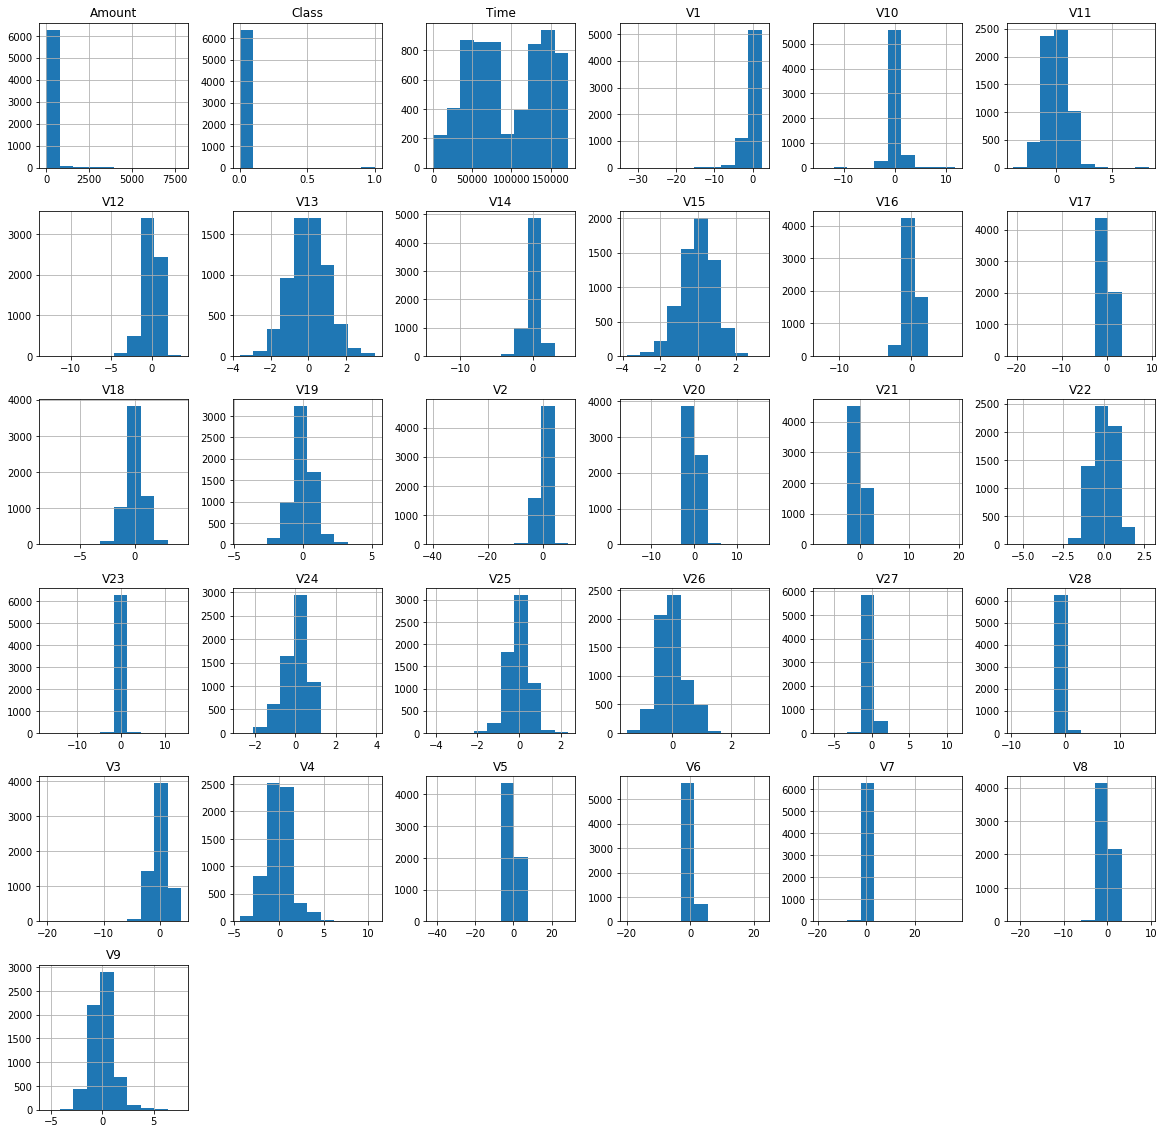

In [28]:
#plot histogram of each parameter with pandas

data.hist(figsize=(20,20))#plt.show=pyplot by matplotlib
plt.show()

In [29]:
#determine the fraud cases in dataset
Fraud=data[data['Class']==1]  #indexing by data class=1#in data 0 represent valid credit 
                               #card transcations and 1 represents the fraud transactions

Valid=data[data['Class']==0]

outlier_fraction=len(Fraud)/float(len(Valid)) #calculating the % of valid cases.Since value will be very low so we have to use flot
print(outlier_fraction)

print('Fraud Cases:{}'.format(len(Fraud)))  #printing no of fraud cases  #using Fraud cases is always good practice

print(('Valid Cases:{}'.format(len(Valid))))

0.0007808839606434484
Fraud Cases:5
Valid Cases:6403


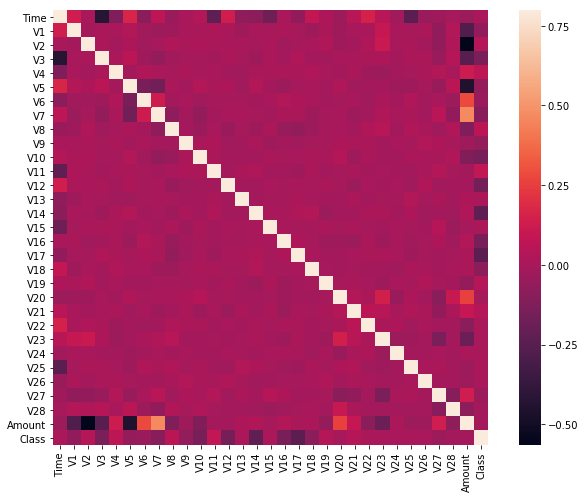

In [31]:
#building correlation matrix=cormat
cormat=data.corr()  #.corr() function provided by pandas
fig=plt.figure(figsize=(11,8))  #matplot

sns.heatmap(cormat,vmax=.8,square=True) #seaborn is used to make heatmap
plt.show()

In [30]:
#get all columns from dataset
columns=data.columns.tolist()  #list of colums will be generated
 #filter the columns to remove data we donot want
    
columns=[c for c in columns if c not in ["Class"]]  # this is unsupervised learning


#store the variable we\ll be predicting on

target="Class"

x=data[columns] #DATA WITH ALL COLUMNS WE ARE INTERESTED IN
y=data[target]


#print the shapes of x & y

print(x.shape)  
print(y.shape)

(6408, 30)
(6408,)


#  fitting data

30 columns in x. Y is 1-d array

WE WILL BE USING ISOLATION ALGORITHM

# Unsupervised Outlier Detection
Now that we have processed our data, we can begin deploying our machine learning algorithms. We will use the following techniques:

Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

Isolation Forest Algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [32]:
from sklearn.metrics import classification_report,accuracy_score #we use matrix to determine how successful we are in outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor #these are 2 common anomalies detection method from sklearn packages. #Support vector machine can also be used but that will take longer time for big dataset

#localoutlierfactor is unsupervised detection  method this calculates the anomaly score of each sample and we call local outlier factor weich measures the localdeviation of density of a
#given sample with respect to its neighbour.

#localouTlier returns the anamolies of each sample using isolation forest. 


# define random states to1 will give same accuracy score every time
#If rand state is not defined then this will give different prediction accuracy everytime

state = 1  #here 1 means true

#define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)
}
  #thats our dictionary of every classifier


In [39]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
       #calculating no of  errors
    
    n_errors = (y_pred != y).sum()   #.sum will append total no of error
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))


/home/suprim/anaconda3/envs/m_l/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/suprim/anaconda3/envs/m_l/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 9
0.9985955056179775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6403
           1       0.17      0.20      0.18         5

   micro avg       1.00      1.00      1.00      6408
   macro avg       0.58      0.60      0.59      6408
weighted avg       1.00      1.00      1.00      6408

Local Outlier Factor: 11
0.9982833957553059
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6403
           1       0.00      0.00      0.00         5

   micro avg       1.00      1.00      1.00      6408
   macro avg       0.50      0.50      0.50      6408
weighted avg       1.00      1.00      1.00      6408



<Figure size 648x504 with 0 Axes>

We have  Isolation Forest with erroe 9
Precision 17% Means we are only identifying  17 % of our actual frau cases.

We have Local Outlier Factor with 11 errors :
Accurcay is 99.8%



this is not accurate method.
